# 1. 데이터 분리
- 데이터의 분리 (훈련/검증/평가)
- 확보한 데이터 중에서 모델 학습에 사용하지 않고 빼둔 데이터를 가지고 모델을 테스트한다
- 과적합인지 아닌지 판단하기 위해 위 같은 과정을 실행

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [3]:
# stratify 옵션 : numpy를 사용해 unique를 확인하면 (ex : [9, 8, 13] 이면 stratify를 사용해 [10, 10, 10]으로 맞춰줌)
x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, random_state=13,
                                                    stratify=labels)

In [4]:
x_train.shape, x_test.shape

((120, 2), (30, 2))

In [5]:
import numpy as np

# return_counts : 0이 몇개있고 1이 몇개있는지 반환함수(True) 줬을 떄
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [6]:
# max_depth 매개변수를 통해 트리의 최대 깊이를 제한
# x_train과 y_train 데이터를 사용하여 Decision Tree 모델을 학습시킴
#  이 모델은 x_train의 데이터 패턴을 학습하여, 새로운 데이터에 대한 예측을 수행할 수 있음

from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.201\nsamples = 44\nvalue = [0, 5, 39]')]

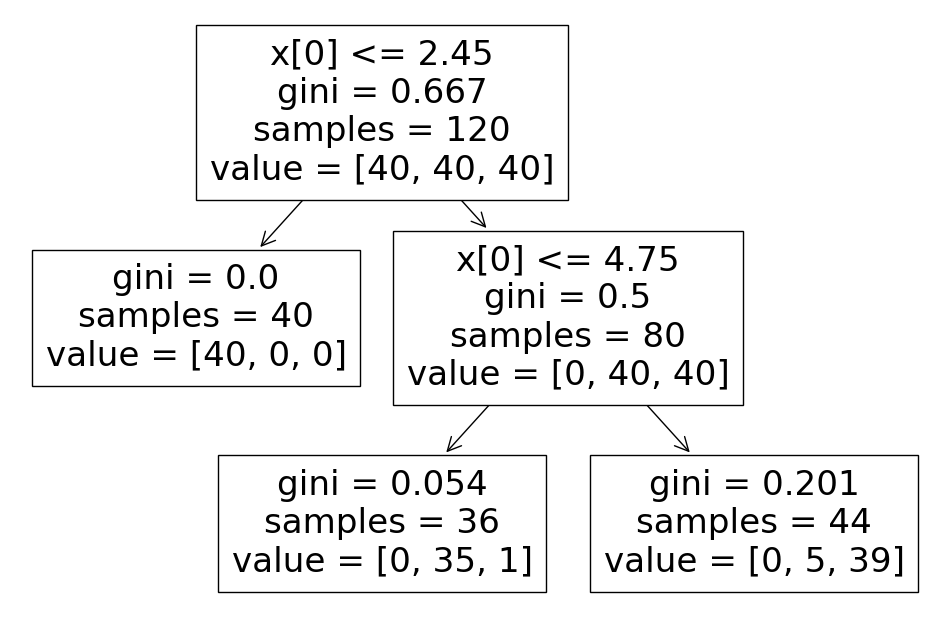

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# iris_tree의 구조를 plot_tree를 가지고와서 그려줌 
plt.figure(figsize=(12, 8))
plot_tree(iris_tree)

In [8]:
from sklearn.metrics import accuracy_score

# 코드풀이 : 학습한 iris_tree 의 150개의 데이터 값만 던져주고 perdict 로 예측하라
# 예측 : predict
y_pred_tr = iris_tree.predict(iris.data[:, 2:])


# accuracy_score 라는 함수를 사용해 iris.target 이라는 정답을 알려주고 예측결과 코드를(y_pred_tr) 주면서 정확도를 계산
# accuracy_score 정답과, 예측을 비교해 정확도를 분석하는 함수
# 결과 0.9533333333333334 % 정확함 아까와 비교했을 떄 약 4% 떨어짐
accuracy_score(iris.target, y_pred_tr)

0.9533333333333334

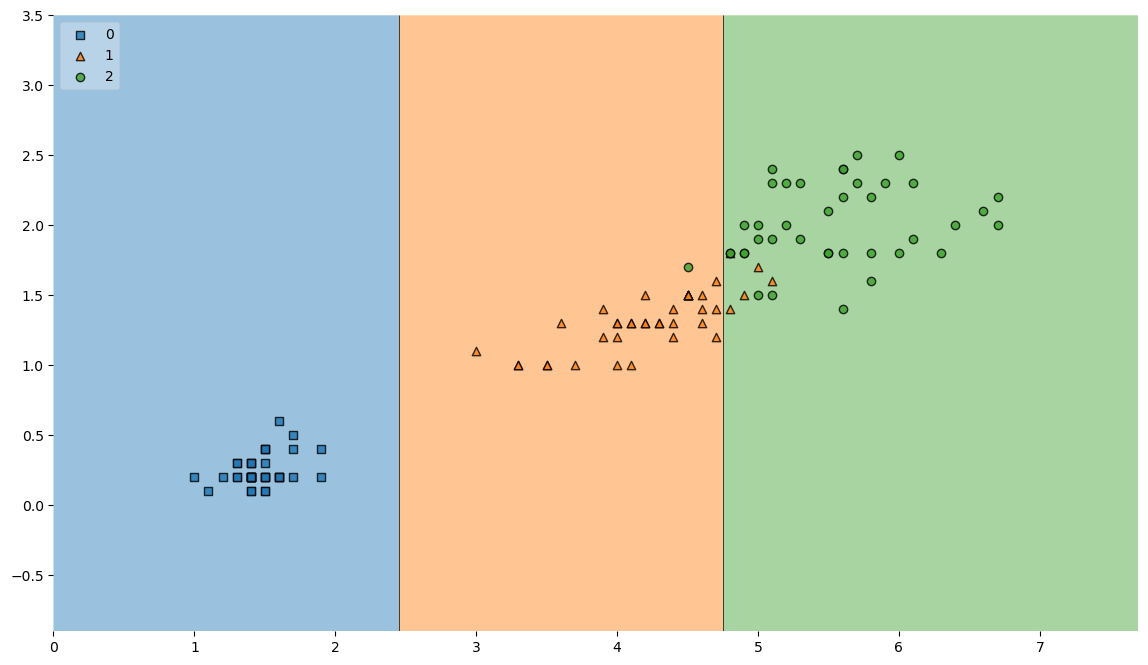

In [9]:
from mlxtend.plotting import plot_decision_regions

# 내가 준 데이터의 경계면을 그어주는 함수 : plot_decision_regions
plt.figure(figsize=(14, 8))
plot_decision_regions(X=x_train, y=y_train, clf=iris_tree, legend=2)
plt.show()
# 전 그래프와 비교했을 떄 깔끔해진걸 볼 수 있음 하지만 그래도 틀린게 조금있다

In [10]:
# 테스트 데이터의 대한 accuracy_score
y_pred_test = iris_tree.predict(x_test)
accuracy_score(y_test, y_pred_test)

# accuracy_score(iris.target, y_pred_tr) 의 값은 0.95% 인거에 비해 오른걸 확인

0.9666666666666667

<Axes: >

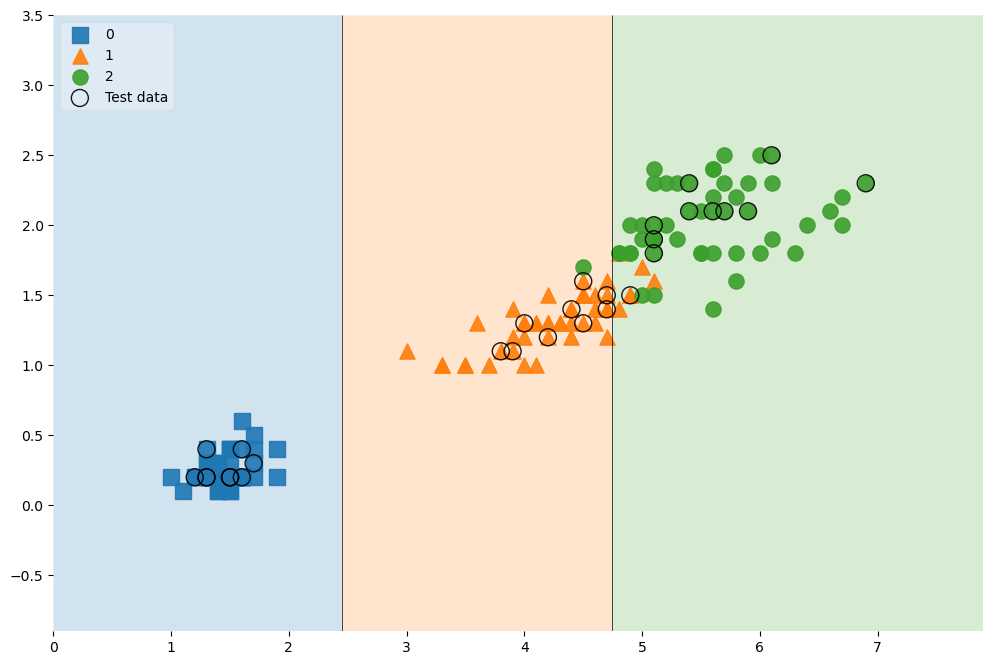

In [15]:
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.9}

# 전체 데이터 중에 뭐가 테스트 데이터인지 강조, 표시 해주는 코드
plt.figure(figsize=(12, 8))
# plot_decision_regions 함수를 사용하여 결정 경계를 시각화
# features: 입력 특성 데이터
# iris_tree: 학습된 Decision Tree 모델
# legend : 범례 위치
# scatter_highlight_kwargs: 테스트 데이터를 강조하는 데 사용되는 키워드 인수
# scatter_kwargs: 전체 데이터의 스캐터 플롯에 대한 키워드 인수
# contour_kwargs: 결정 경계의 스타일을 설정하는 키워드 인수
plot_decision_regions(X=features, y=labels,
                      X_highlight=x_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha':0.2})

In [16]:
features = iris.data
labels = iris.target

x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, random_state=13,
                                                    stratify=labels)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.201\nsamples = 44\nvalue = [0, 5, 39]')]

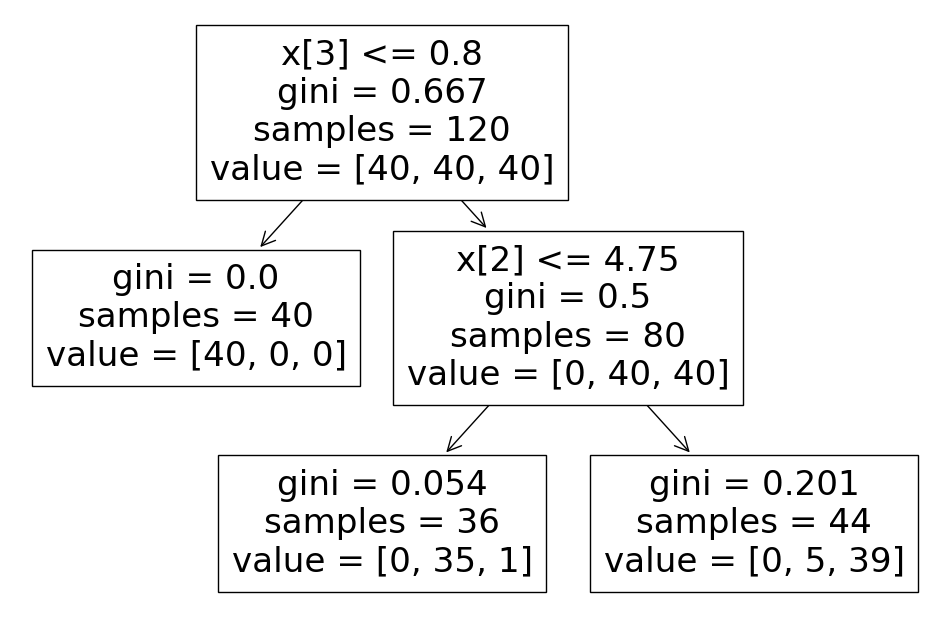

In [17]:
# iris_tree의 구조를 plot_tree를 가지고와서 그려줌 
plt.figure(figsize=(12, 8))
plot_tree(iris_tree)

In [25]:
# 학습을 완료한 모델(iris_tree)한테 test_data를 predict(입력 데이터에 대해 모델이 어떤 결과를 예상) 
test_data = np.array([[4.3, 2, 1.2, 1]])
iris_tree.predict(test_data)

array([1])

In [26]:
test_data.shape

(1, 4)

In [27]:
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [28]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [30]:
iris_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
iris_tree.fit(x_train, y_train)

iris_tree.feature_importances_

array([0.        , 0.03389831, 0.39580123, 0.57030046])

In [32]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.033898305084745756,
 'petal length (cm)': 0.3958012326656394,
 'petal width (cm)': 0.5703004622496148}

## 간단한 zip과 언패킹

In [33]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]


In [34]:
# zip : 요소들을 묶어서 튜플의 형태로 반환
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [35]:
# 딕셔너리 형태로 변환
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [36]:
# 위 과정을 한번에
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [37]:
# zip한걸 풀어주는 코드(언팩킹)
x, y = zip(*pairs)

In [38]:
x

('a', 'b', 'c')

In [39]:
y

(1, 2, 3)

In [40]:
# 위 과정을 리스토로 변경
list(x)

['a', 'b', 'c']

In [41]:
# 위 과정을 리스토로 변경
list(y)

[1, 2, 3]